## Learning Objectives

Today we learn about infinite hypotheses and we use linear regression to do so.

We learn that we can learn over the set of infinite hypotheses and we learn a rule of thumb that will help use make learning decisions.

We also learn about our first serious machine learning algorithm and the parts that make it up.

## So where is the linear regression?

You all might have been a bit confused as to why we have not brought up any of the classics: linear regression, random forests, svms. These are the real ML algorithms, when are we getting to them?

Well this is a general data science course, so while it would be nice to go into details about every ML algorithm ever invented, we can't. We just don't have the time to do so. So instead we are studying the theory that underpins them all. 

And so far we have covered the vast majority of the theory that pertains to these alogrithms. The train and test set will still apply, you will still have a reported performance in the end. The major differences apply to the hypothesis set, the error measure, and the learning algorithm in the diagram below:

In [ ]:
import networkx as nx
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'

c0 = 'Unknown target function, f(X) = y + noise'
c1 = 'Inputs, (x_1, y_1), ..., (x_n, y_n)'
c2 = 'Learning Algorithm'
c3 = 'Hypothesis set, H'
c4 = 'Final Hypothesis, g(X) = y'
c5 = 'IID samples from a r.v. X'
c6 = 'Train set'
c7 = 'Test set'
c8 = 'Reported Hypothesis Performance'
c9 = 'Error Measure'

nodes = [c0, c1, c2, c3, c4, c5, c6, c7, c8, c9]

G = nx.DiGraph()

for n in nodes:
    G.add_node(n)

G.add_edge(c0, c1)
G.add_edge(c3, c2)
G.add_edge(c2, c4)
G.add_edge(c5, c1)
G.add_edge(c1, c6)
G.add_edge(c1, c7)
G.add_edge(c6, c2)
G.add_edge(c7, c8)
G.add_edge(c4, c8)
G.add_edge(c9, c8)
G.add_edge(c9, c2)

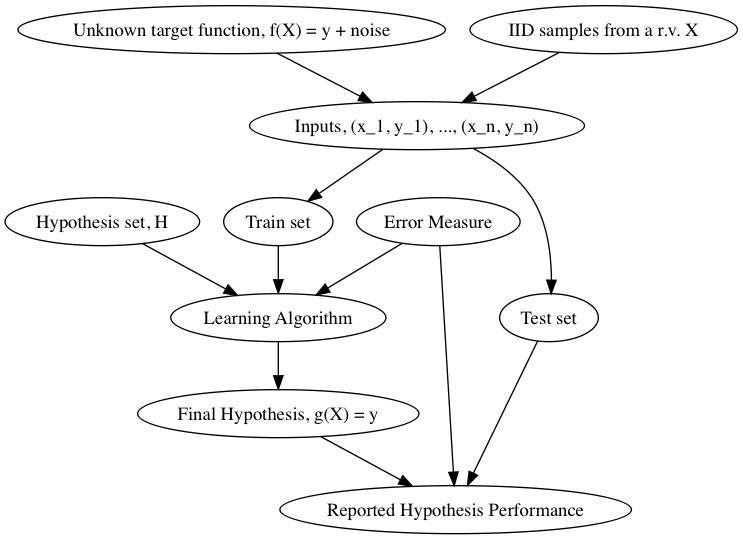

In [1]:
draw(G)

## Linear Regression

So let's begin by explaining linear regression in the terms we know and love. 

Linear regression is a way of specifying the error measure, the hypothesis set, and the learning algorithm.

#### Error measure

This is pretty easy, in linear regression the error measure is MSE (mean squared error)

#### Hypothesis set

In linear regression (just as in all supervised learning problems) you have a set of factors: x_0, x_1, ..., x_n. Your hypotheses will all have the form of:

$$ f(X) = w_0 * x_0 + w_1 * x_1 + ... + w_n * x_n = \hat{y} $$

So if you had two factors x_0 and x_1, a some possible hypotheses could be: 2 * x_0 + 3.4 * x_1. Or 0 * x_0 - 100 * x_1. 

The thing is that the w's could be any real number... Yes that means we have infinite hypotheses!

Well now wait you proclaim! You know that the bounds on the performance of an algorithm drop as the number of hypotheses increase. So infinite hypotheses should mean no bounds! Right? 

Well let me ask you a question:

<blockquote>
How different are these two hypotheses: 1.00001 * x_0 and 1.00002 * x_0?
</blockquote>

Not that different. It turns out most of the hypotheses are pretty close to each other. Please don't let this be the only proof that you get here, but other than this hand wavy arguement, this is all the proof I'm going to give you. There is extensive theoretical work on this subject all under the idea of a VC dimention if you are curious for some light reading. 

That being said, I will cut to the chase. A responsible data scientist will:

For every infinite parameter in the model, have at least 10 data points to train your model on.

So for this one: w_0 * x_0, have at least 10. For this guy:  w_0 * x_0 + w_1 * x_1 + ... + w_n * x_n, have at least (n + 1) * 10

But yes we still do learn!

#### Learning algorithm

The learning algorithm for linear regression is very important but not for what we are studying here. The one thing that you need to know about it is that it is very very fast.

## A better example

Thus far we have used completely fake data to walk through our learning problems. I say that this time we use some real data! Let's check it out:

In [1]:
%matplotlib inline
import seaborn as sns

tips = sns.load_dataset("tips")

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


So we have made a small no no here, we have looked at the data before splitting it. Generally I would call this fine. Perhaps a good practice would be to use a small chunk of data just as inspection data in the beginning. But this is so we know generally what our data looks like and we can make important decisions about splitting our data (very important with class imbalance issues or time series data).

But in our case here, it is just to look at the columns. The data we will be using is a tip dataset. Here the y's are the tips and the X's are the total bill (yes I know we can just guess this right!). So we will try two approach this problem in two ways. First is the old way where we try out only 3 hypotheses, and the second way is with linear regression.

So let's begin:

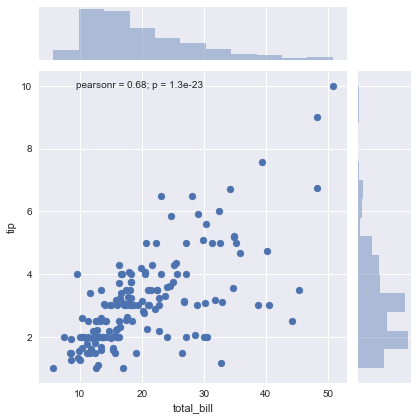

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    tips.total_bill, tips.tip, test_size=0.33, random_state=42)

sns.jointplot(X_train, y_train)

They look pretty related. Well let's try some hypotheses, first is that this tip is 20%, second is 18% and third is 15%, and then let's judge which is the best hypothesis based on MSE:

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

hypothesis_set = []

hypothesis_set.append(lambda x: x * .2)
hypothesis_set.append(lambda x: x * .18)
hypothesis_set.append(lambda x: x * .15)

In [3]:
scores = []
for i, h in enumerate(hypothesis_set):
    preds = map(h, X_train)
    score = mean_squared_error(y_train, preds)
    print i, score
    
    scores.append(score)
    
best_hypo = np.argmin(scores)
print 'The best hypothesis is:', best_hypo

0 2.68961094479
1 1.83890980025
2 1.29138586503
The best hypothesis is: 2


Okay we got an okay MSE. You know what the next step is right? We test our hypothesis. STOP! Careful, we should not in a real ML situation test our hypothesis until we are ready to proclaim this the final hypothesis. So while we will be testing two final hypotheses in the end, note that this is not the norm.

Okay let's next try linear regression:

In [6]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=False)

reg.fit(X_train.to_frame(), y_train)

print 'The tip percent:', reg.coef_
reg_preds = reg.predict(X_train.to_frame())
print 'The MSE:', mean_squared_error(reg_preds, y_train)

The tip percent: [ 0.14621129]
The MSE: 1.28441417686


Okay, much better right? We searched over all possible values of w_0 and found the best one to minimize the MSE, wow. And no surprise, we got a pretty low MSE. As we discussed before, the bigger your hypothesis set (total number of hypotheses or if there are infinite parameters the total number of infinite parameters therein) the better your initial training loss. And we see that below. But what else did we say? The bigger your hypothesis set, the smaller the bound. Let's see if that is true by testing our two final hypotheses:

In [5]:
preds = map(hypothesis_set[best_hypo], X_test)
score = mean_squared_error(y_test, preds)

print 'Finite H score:', score
print
reg_preds = reg.predict(X_test.to_frame())
print 'Infinite H (linear regression) score:', mean_squared_error(reg_preds, y_test)

Finite H score: 1.00585260185

Infinite H (linear regression) score: 0.972918784291


You may not see this effect (we are just doing a single linear regression), but what should happen is that there is a greater chance that the linear regression test score is farther from its train score than the finite hypothesis test score is from its. We will explore this more in the future.

## Take aways

The big take aways here are that you can have infinite hypothesis sets, and the rule of thumb: for every infinite parameter in your hypothesis set have at least ten data points.

Next time we will explore the most important trade off in machine learning!

## Learning Objectives

Today we learn about infinite hypotheses and we use linear regression to do so.

We learn that we can learn over the set of infinite hypotheses and we learn a rule of thumb that will help use make learning decisions.

We also learn about our first serious machine learning algorithm and the parts that make it up.

## Comprehension Questions

1.	How did linear regression get its name?
2.	Why is the error measure for linear regression MSE?
3.	What does it mean for two hypotheses to be similar? 
4.	Do hypotheses depend on the data?
5.	Is the training error a good tell for what the best hypothesis will be?
